In [1]:
# Import all tool we need

# Regular data analysis and EDA (Exploratory Data Analysis) and ploting libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear inside the Notebook
%matplotlib inline

# Models From Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.shape

(1025, 14)

# Data Exploration (Data Exploratory Analysis or EDA)

> The goal here is to find out more about the data and become a subject matter ecpert on the dataset you're working with.

1. whats question(s) are trying to solve?
2. what kind of data do we have and how do we treat different type.
3. what's missing form data and how you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df["target"].value_counts()

,count
target,
1,526
0,499


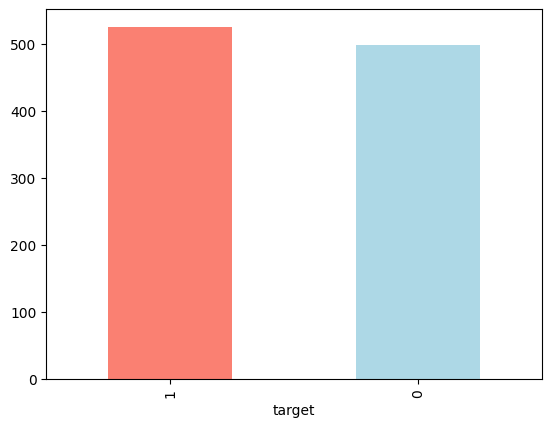

In [8]:
df["target"].value_counts().plot(kind="bar", color=['salmon', "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()

,count
sex,
1,713
0,312


In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


/tmp/ipython-input-1942999127.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Male", "Female")


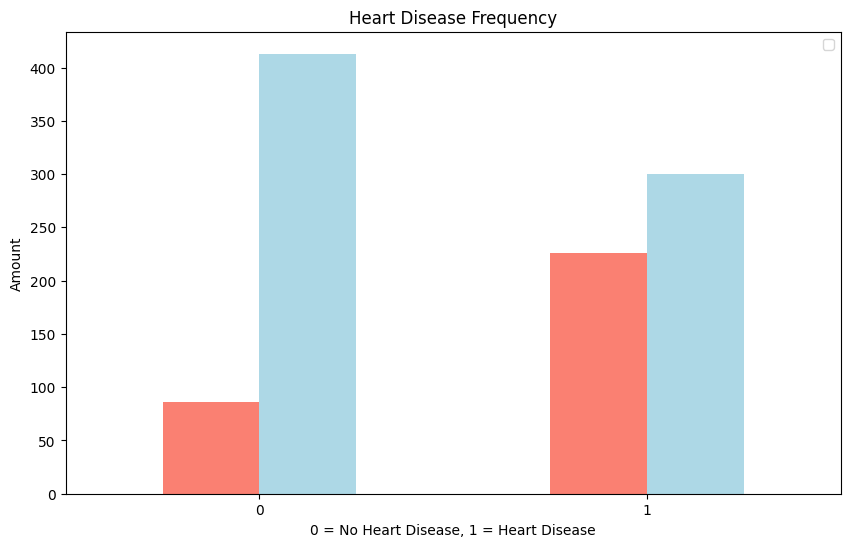

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend("Male", "Female")
plt.xticks(rotation=0)
plt.show()

**Age Vs. Max Heart Rate for Heart Disease**

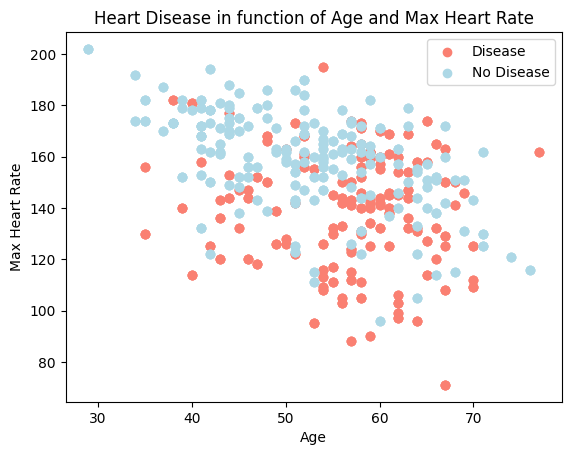

In [15]:
plt.figsize = (10, 6)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="salmon")


plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="lightblue")


plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

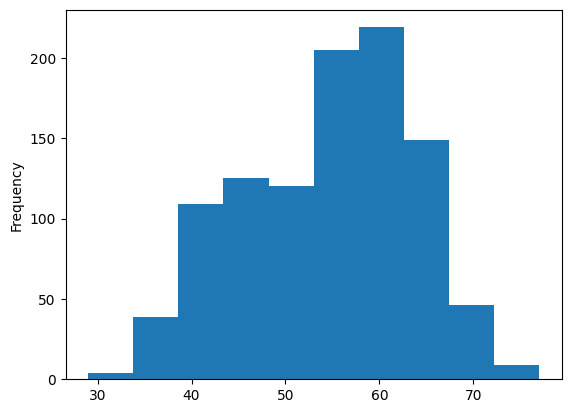

In [16]:
df.age.plot.hist();

**Heart Disease Frequency per chest pain type**

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


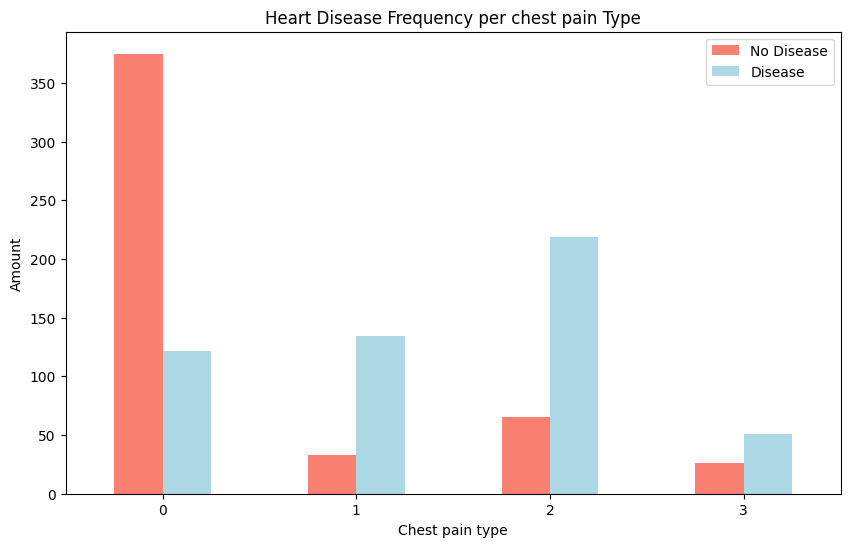

In [18]:
pd.crosstab(df.cp, df.target ).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per chest pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

**Make a Correlation Matrix**

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


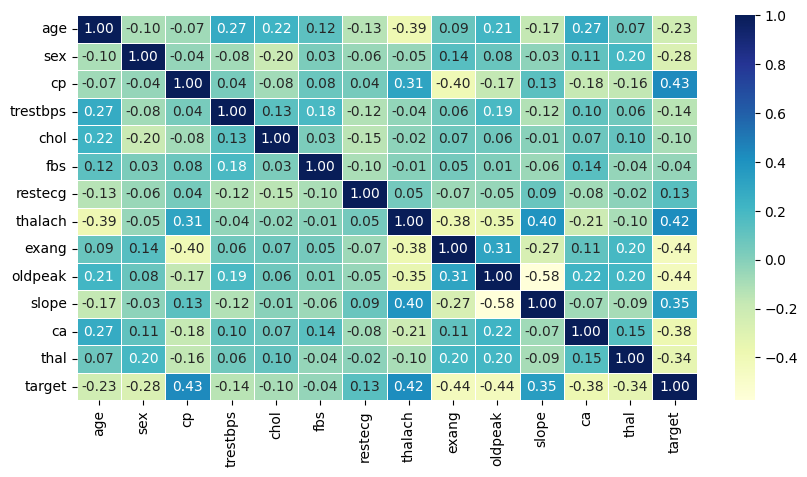

In [20]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# **Modelling**

In [21]:
# spliting Data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [24]:
# split the data into test and train
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [26]:
y_train

,target
835,0
137,1
534,1
495,1
244,1
...,...
700,1
71,0
106,0
270,1


Now we've got our data split into training and test sets, it's time to build a machine learning model.

we'll train it (find the patterns) on the training set.

And we'll test it (use the pattern) on the test set.

We're going to try 3 different machine learning models.
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Put Models in Dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest ": RandomForestClassifier()}

# Create a funtion to fit and score Model

def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and Evaluate The given Machine Learning Models.
  Models : A Dict of different Scikit-Learn Machine Learning Models.
  X_train : training data (no labels)
  X_test : test data (no labels)
  y_train : training labels
  y_test : test labels
  """
  # Set a random seed
  np.random.seed(42)
  # Make a dictionary to keep a model score
  model_score = {}
  # loop through models
  for name, model in models.items():
    # fit the model to the data
    model.fit(X_train, y_train)
    # evluate the model and append its score to model_score
    model_score[name] = model.score(X_test, y_test)
  return model_score

In [28]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest ': 0.9853658536585366}

# **Model Comparision**

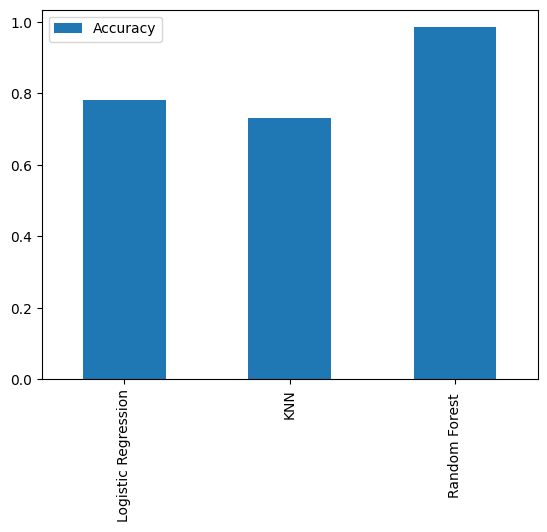

In [29]:
model_compare = pd.DataFrame(model_score, index=["Accuracy"])
model_compare.T.plot.bar();

In [30]:
clf= RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
clf.score(X_test, y_test)

0.9853658536585366

In [32]:
# Make Predicition with tunned model
y_preds = clf.predict(X_test)

# **Confusion Matric**

In [33]:
print(confusion_matrix(y_test, y_preds))

[[102   0]
 [  3 100]]


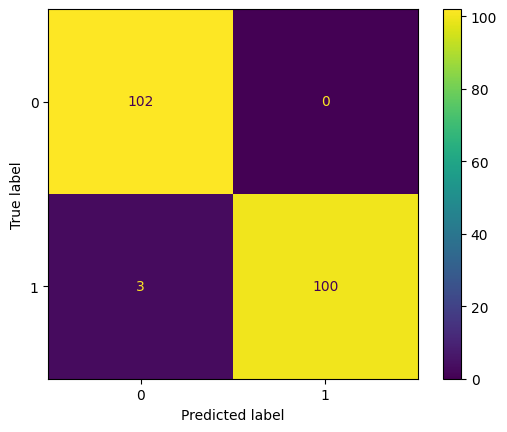

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

# **Classification Report**

In [35]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Calculate Evalution metrics using cross-validation**


we're going to calculate accuracy, precision, recall, and f1 score of our model using cross-validation and to do so we'll be using `cross_val_score`.

In [36]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.9970731707317073)

In [37]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_acc)
cv_precision

np.float64(0.9970731707317073)

In [38]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_acc)
cv_recall

np.float64(0.9970731707317073)

In [39]:
# cross-validated f1-score
cvf1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_acc)
cv_f1

np.float64(0.9970731707317073)

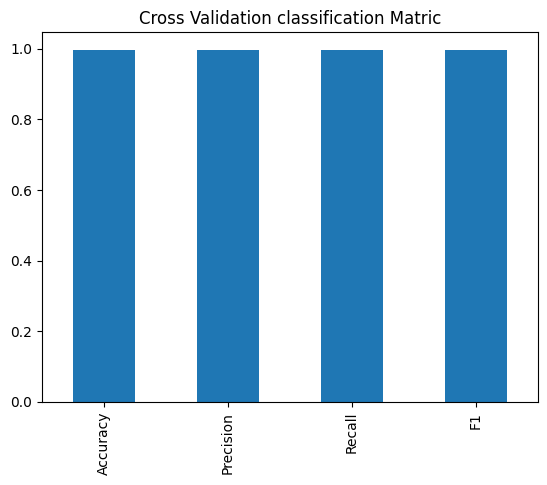

In [40]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1":cv_f1},
                          index=[0])




cv_metrics.T.plot.bar(title="Cross Validation classification Matric",
                      legend=False);

# **Saving and loading trained machine learning models**

In [41]:
import pickle

In [42]:
pickle.dump(clf,open("clf_random_forest_heart_disease.pkl","wb"))

In [43]:
loaded_model = pickle.load(open("clf_random_forest_heart_disease.pkl", "rb"))

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [45]:
# x = np.array([55,1,0,123,200,0,1,170,0,1.0,2,2,3]).reshape()
c = ["age","sex","cf","trestbps","chol","fbs","restecg","thalach", "exang", "oldpeak","slope","ca","thal"]

In [46]:
ee = pd.DataFrame([[55,1,0,123,200,0,1,170,0,1.0,2,2,3]], columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach", "exang", "oldpeak","slope","ca","thal"])

In [47]:
loaded_model.predict(ee)

array([0])